In [1]:
# Cargar funciones de la librería de python data analysis
import pandas as pd 
import numpy as np

# Leer csv con datos y cargar en el dataframe data.
##Al comenzar a trabajar consideramos que los datos estan "limpios" y ordenados en un csv
data = pd.read_csv("data/creditos.csv") 

# calcular variable edad a partir de fecha de solicitud - fecha de nacimiento
data['fechaHora'] = pd.to_datetime(data['fechaHora'])
data['nacimiento'] = pd.to_datetime(data['nacimiento'])
data['edad'] = ((data['fechaHora']-data['nacimiento'])/np.timedelta64(1,'Y')).astype(int)
                    #####No entiendo np.timedelta64(1,'Y')######
data.head()

,id,fechaHora,nacionalidad,nacimiento,sexo,est_civil,ocup_cargo,cliente_nuevo_o_recurrente,prestamo_renovacion_paralelo,monto_solicitado,...,interes,interesPagado,vigente,saldo,saldoInteresGS,ventaCartera,importeVentaCartera,tipoCartera,resultadoFinal,edad
0,1,2016-03-23 16:57:50,PY,1984-01-28,M,S,EMPLEADO,R,3,1500000,...,250645.0,250645.0,NO,0.0,0.0,0,0.0,NaN,BIEN,32
1,2,2016-03-28 15:35:31,PY,1966-11-13,F,S,EMPLEADO,R,2,9969326,...,7237203.0,4657926.0,SI,8290750.0,2817630.0,0,0.0,NORMAL,BIEN,49
2,3,2016-03-16 12:35:42,PY,1963-01-31,M,S,EMPLEADO,R,2,-2369825,...,2041828.0,3045159.0,NO,0.0,0.0,0,0.0,NORMAL,BIEN,53
3,4,2016-03-28 10:05:32,PY,1962-08-08,M,C,EMPLEADO,R,2,5000000,...,2555180.0,3072230.0,NO,0.0,0.0,1,5535856.0,NORMAL,MAL,53
4,5,2016-03-15 11:34:44,PY,1977-03-31,M,S,EMPLEADO,N,3,2000000,...,438468.0,670072.0,NO,0.0,0.0,1,912730.0,NaN,MAL,38


In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn import preprocessing

###En df elegimos las variables que más nos interesan o que consideramos relevantes
df = data[['edad','cliente_nuevo_o_recurrente','monto_solicitado','tiene_ips',
           'plazo_solicitado','ingreso_neto_mensual','resultadoFinal']]

# One-hot encoding para variables categoricas
x = pd.get_dummies(df)

# Normalizacion a [0-1]
min_max_scaler = preprocessing.MinMaxScaler()
xNorm = pd.DataFrame(min_max_scaler.fit_transform(x.values))
xNorm.head()

,0,1,2,3,4,5,6,7,8
0,0.213115,0.131923,1.0,0.131148,0.007812,0.0,1.0,1.0,0.0
1,0.491803,0.184803,1.0,0.606557,0.007812,0.0,1.0,1.0,0.0
2,0.557377,0.107761,1.0,0.000000,0.014062,0.0,1.0,1.0,0.0
3,0.557377,0.153776,1.0,0.393443,0.005781,0.0,1.0,0.0,1.0
4,0.311475,0.135045,1.0,0.196721,0.009375,1.0,0.0,0.0,1.0


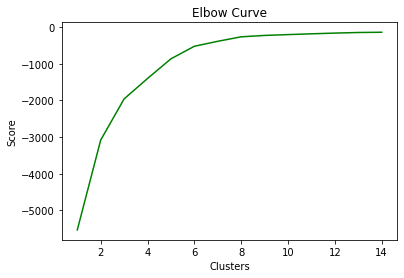

In [17]:
# Elbow Curve
nc = range(1, 15)
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(xNorm).score(xNorm) for i in range(len(kmeans))]

plt.plot(nc, score, color='green') 
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=100, max_iter=300, random_state=1)
kmeans.fit(xNorm)
print("Score: " + str(kmeans.score(xNorm)))
print(kmeans.labels_)
#print(kmeans.cluster_centers_)

clusters = pd.DataFrame(min_max_scaler.inverse_transform(kmeans.cluster_centers_), columns=x.columns)
clusters['tiene_ips'] = clusters['tiene_ips'].round()
clusters['cliente_nuevo_o_recurrente_N'] = clusters['cliente_nuevo_o_recurrente_N'].round()
clusters['cliente_nuevo_o_recurrente_R'] = clusters['cliente_nuevo_o_recurrente_R'].round()
clusters['resultadoFinal_BIEN'] = clusters['resultadoFinal_BIEN'].round()
clusters['resultadoFinal_MAL'] = clusters['resultadoFinal_MAL'].round()
clusters